# Computing the NAV per share for Corp Bond UCITS ETF

The historical data pertaining to the fund is obtained from the 'Historical' sheet of 'iShares--Corp-Bond-UCITS-ETF-USD-Dist-USD-Distributing_fund.xlsx' excel file.

In [26]:
import pandas as pd

## Loading the data into a data frame and handling missing values

In [37]:
df = pd.read_excel('/Users/michaelreginiano/Documents/Coding/Python/iShares--Corp-Bond-UCITS-ETF-USD-Dist-USD-Distributing_fund.xlsx', sheet_name="Historical",na_values="--")

### Ensuring data was loaded properly

In [38]:
df

,As Of,Currency,NAV,Securities In Issue,Net Assets,Fund Return Series,Benchmark Return Series
0,19/Aug/2021,USD,129.187601,31558488.0,4.076965e+09,242.459999,250.266516
1,18/Aug/2021,USD,129.027416,31678639.0,4.087413e+09,242.159363,250.000291
2,17/Aug/2021,USD,128.988399,31196159.0,4.023943e+09,242.086136,249.918048
3,16/Aug/2021,USD,129.263507,31198856.0,4.032874e+09,242.602460,250.448958
4,13/Aug/2021,USD,129.098057,31083977.0,4.012881e+09,242.291942,250.083777
5,12/Aug/2021,USD,128.180645,31141052.0,3.991680e+09,240.570139,248.304683
6,11/Aug/2021,USD,128.052827,31242506.0,4.000691e+09,240.330249,248.107099
7,10/Aug/2021,USD,128.035690,31394366.0,4.019599e+09,240.298086,248.071549
8,09/Aug/2021,USD,128.345483,31394730.0,4.029372e+09,240.879507,248.667834
9,06/Aug/2021,USD,128.739204,31398376.0,4.042202e+09,241.618445,249.380599


## Removing the given NAV

In [39]:
df = df.drop(columns=['NAV'])


## Computing the NAV using elementary Pandas

### We begin by handing missing values

In order to avoid run-time errors, we have to ensure that the pertinent columns are of type float

In [50]:
def make_float(i):
    try:
        return float(i)
    except:
        return pd.np.nan
        
#apply the make_float function to the 'Securities In Issue' and 'Net Assets' columns

df['Securities In Issue'] = df['Securities In Issue'].map(make_float)
df['Net Assets'] = df['Net Assets'].map(make_float)

### We now compute the NAV by using the formula Net Assets/Shares Outstanding

In [52]:
df['NAV'] = df['Net Assets']/df['Securities In Issue']

## Final Output

In [54]:
df

,As Of,Currency,Securities In Issue,Net Assets,Fund Return Series,Benchmark Return Series,NAV
0,19/Aug/2021,USD,31558488.0,4.076965e+09,242.459999,250.266516,129.187601
1,18/Aug/2021,USD,31678639.0,4.087413e+09,242.159363,250.000291,129.027417
2,17/Aug/2021,USD,31196159.0,4.023943e+09,242.086136,249.918048,128.988399
3,16/Aug/2021,USD,31198856.0,4.032874e+09,242.602460,250.448958,129.263507
4,13/Aug/2021,USD,31083977.0,4.012881e+09,242.291942,250.083777,129.098058
5,12/Aug/2021,USD,31141052.0,3.991680e+09,240.570139,248.304683,128.180646
6,11/Aug/2021,USD,31242506.0,4.000691e+09,240.330249,248.107099,128.052828
7,10/Aug/2021,USD,31394366.0,4.019599e+09,240.298086,248.071549,128.035691
8,09/Aug/2021,USD,31394730.0,4.029372e+09,240.879507,248.667834,128.345483
9,06/Aug/2021,USD,31398376.0,4.042202e+09,241.618445,249.380599,128.739204


# A Step Further...

## We could easily go a step further and plot a graph of NAV against time since inception of the fund

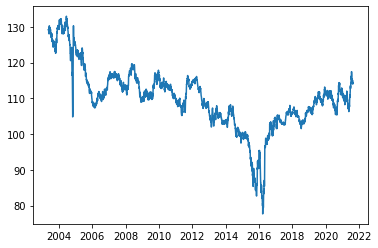

In [65]:
import matplotlib.pyplot as plt
plt.plot(pd.to_datetime(df['As Of'][::-1]),df['NAV'])
